In [1]:
import numpy as np
import pandas as pd


In [3]:
db=pd.read_csv('Dataset/diabetes.csv')

In [23]:
db.head()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
db.isnull()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False


In [6]:
db.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [9]:
db[db.isnull().any(axis=1)]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic


In [10]:
mean_db = db['DiabetesPedigree'].mean()

In [32]:
print("Average Dibetic value is: {:.2f}\n". format(mean_db))

Average Dibetic value is: 0.40



In [13]:
db[db.DiabetesPedigree>mean_db]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
16,1884264,3,106,64,25,51,29.044573,0.589188,42,1
...,...,...,...,...,...,...,...,...,...,...
14980,1552787,9,56,48,35,21,19.321562,0.614377,23,0
14987,1840388,2,81,79,69,20,35.093644,0.766683,47,1
14994,1453189,0,72,99,32,32,20.932808,0.545038,22,0
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1


In [34]:
diabetic_th=db[db['Diabetic']==1].DiabetesPedigree.min()
print("People having value >= {:.2f} or more are diabetic".format(diabetic_th))

People having value >= 0.08 or more are diabetic


In [39]:
print(db.groupby(db.Diabetic).PatientID.count())

Diabetic
0    10000
1     5000
Name: PatientID, dtype: int64


In [45]:
print(db.groupby(db.Diabetic)[['PlasmaGlucose','DiabetesPedigree','Age']].mean())

          PlasmaGlucose  DiastolicBloodPressure        BMI  DiabetesPedigree  \
Diabetic                                                                       
0              104.9622                 70.1387  30.057052          0.353457   
1              113.6462                 73.3846  34.414834          0.489990   

              Age  
Diabetic           
0         27.2090  
1         35.9952  


In [47]:
binSize = list(range(0,db['Age'].max()+21,20))

In [48]:
binSize

[0, 20, 40, 60, 80]

In [49]:
db.Age.max()

77

In [51]:
bin_labels= [ f'{i}-{i+19}' for i in binSize[:-1]]

In [52]:
bin_labels

['0-19', '20-39', '40-59', '60-79']

In [62]:
db['Agebin']=pd.cut(db['Age'], bins=binSize, labels=bin_labels, include_lowest='true')

In [63]:
db

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Agebin
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,20-39
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,20-39
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,20-39
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,40-59
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,20-39
...,...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1,40-59
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1,20-39
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0,20-39
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0,20-39


C:\Users\Saura\AppData\Local\Temp\ipykernel_33316\3520523914.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped=db.groupby('Agebin')['BMI'].mean()


(array([0, 1, 2, 3]),
 [Text(0, 0, '0-19'),
  Text(1, 0, '20-39'),
  Text(2, 0, '40-59'),
  Text(3, 0, '60-79')])

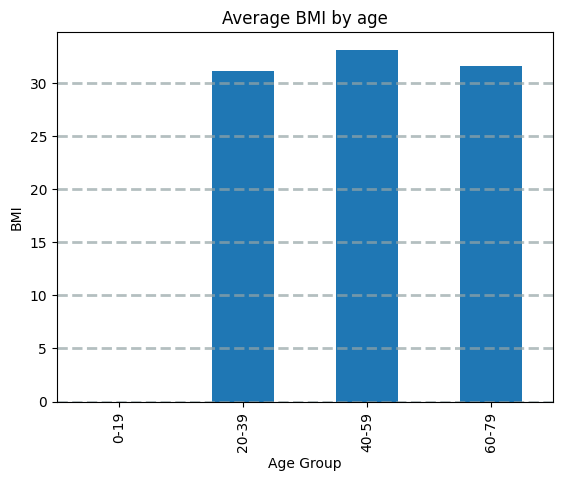

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt

age_grouped=db.groupby('Agebin')['BMI'].mean()

age_grouped.plot(kind='bar')
plt.title('Average BMI by age')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

In [73]:
age_grouped

Agebin
0-19           NaN
20-39    31.133385
40-59    33.134823
60-79    31.549833
Name: BMI, dtype: float64

In [84]:
# calculating %age of individuals having sugar in each age group

sugar_ptg = db.groupby('Agebin').agg({'Diabetic':'sum', 'PatientID': 'count'})

C:\Users\Saura\AppData\Local\Temp\ipykernel_33316\1168988879.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sugar_ptg = db.groupby('Agebin').agg({'Diabetic':'sum', 'PatientID': 'count'})


In [108]:
sugar_ptg

,Diabetic,PatientID
Agebin,,
0-19,0,0
20-39,2814,11834
40-59,2020,2729
60-79,166,437


In [86]:

age_prt=db.groupby('Agebin')['Diabetic'/'PatientID']

age_grouped.plot(kind='bar')
plt.title('Average BMI by age')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

C:\Users\Saura\AppData\Local\Temp\ipykernel_33316\2393631469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prt=db.groupby('Agebin')['Diabetic'/'PatientID']


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [114]:
#age_group=db.groupby('Agebin')
#def divide_col(sugar_ptg):
  # return (sugar_ptg['Diabetic'].sum() / sugar_ptg['PatientID'].count()) * 100
#ptg= age_group.transform(devide_col)

In [102]:
db['Diabetic']


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [105]:
print(db.columns)

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic', 'Agebin'],
      dtype='object')


In [112]:
sugar_ptg['percentage'] = (sugar_ptg['Diabetic']/sugar_ptg['PatientID'])*100


In [113]:
sugar_ptg

,Diabetic,PatientID,percentage
Agebin,,,
0-19,0,0,NaN
20-39,2814,11834,23.778942
40-59,2020,2729,74.019787
60-79,166,437,37.986270


(array([0, 1, 2, 3]),
 [Text(0, 0, '0-19'),
  Text(1, 0, '20-39'),
  Text(2, 0, '40-59'),
  Text(3, 0, '60-79')])

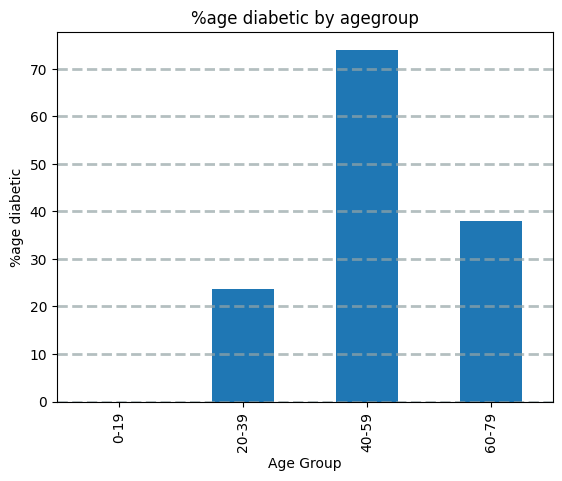

In [120]:
sugar_ptg['percentage'].plot(kind='bar')
plt.title('%age diabetic by agegroup')
plt.xlabel('Age Group')
plt.ylabel('%age diabetic')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)